# Zomato Data Analysis Using Python

### Import necessary Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Create the data frame

In [4]:
dataframe = pd.read_csv(r"C:\Users\dhawa\OneDrive\Desktop\project\Zomato_data.csv")


### To obtain a summary of the data frame

In [7]:
print(dataframe.head())

print(dataframe.info())

print(dataframe.describe())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 

### Before proceeding, let’s convert the data type of the “rate” column to float and remove the denominator

In [8]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### To obtain a summary of the data frame

In [10]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None


## 1) Let’s explore the listed_in (type) column

Text(0.5, 0, 'Type of restaurant')

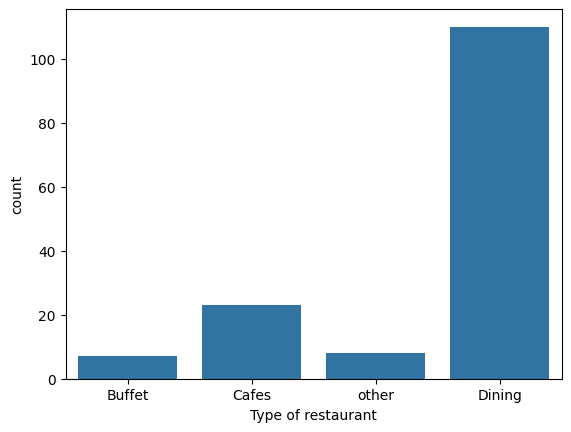

In [11]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

### Conclusion: The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

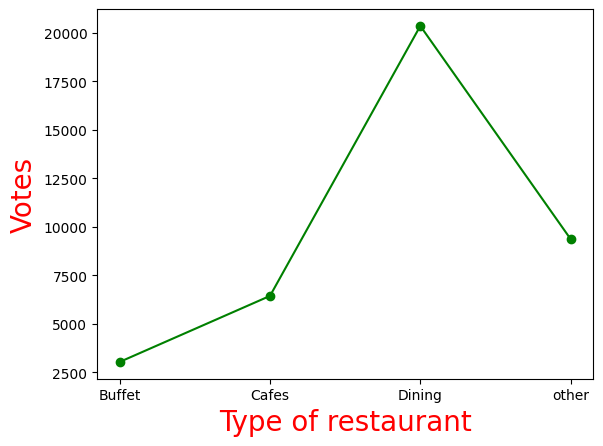

In [12]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

### Conclusion: Dining restaurants are preferred by a larger number of individuals.

## 2) Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [13]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


## 3) Let’s explore the online_order column.

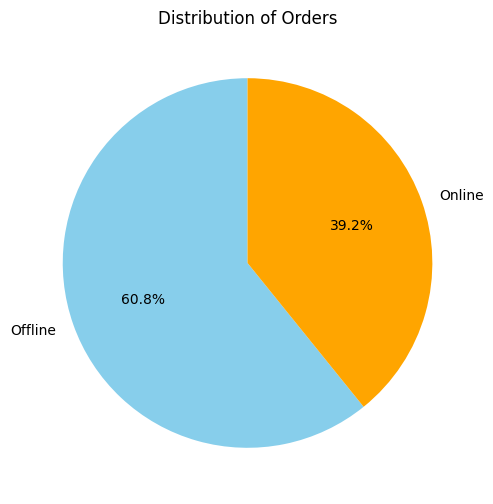

In [17]:
order_type = dataframe

order_type['online_order'] = order_type['online_order'].replace({'Yes': 'Online', 'No': 'Offline'})

order_counts = order_type['online_order'].value_counts()

plt.figure(figsize=(6, 6))
order_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Distribution of Orders')
plt.ylabel('')  # Removes the default y-axis label
plt.show()

### Conclusion: This suggests that a majority of the restaurants do not accept online orders.

## 4) Let’s explore the rate column.

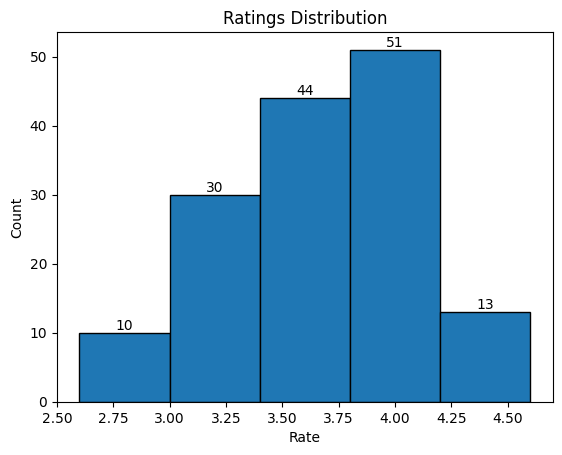

In [19]:
# Plot the histogram
n, bins, patches = plt.hist(dataframe['rate'], bins=5, edgecolor='black')

# Add counts on top of each bar
for count, bin_edge in zip(n, bins[:-1]):
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

# Add title and labels
plt.title('Ratings Distribution')
plt.xlabel('Rate')
plt.ylabel('Count')

plt.show()

### Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

## 5) Let’s explore the approx_cost(for two people) column.

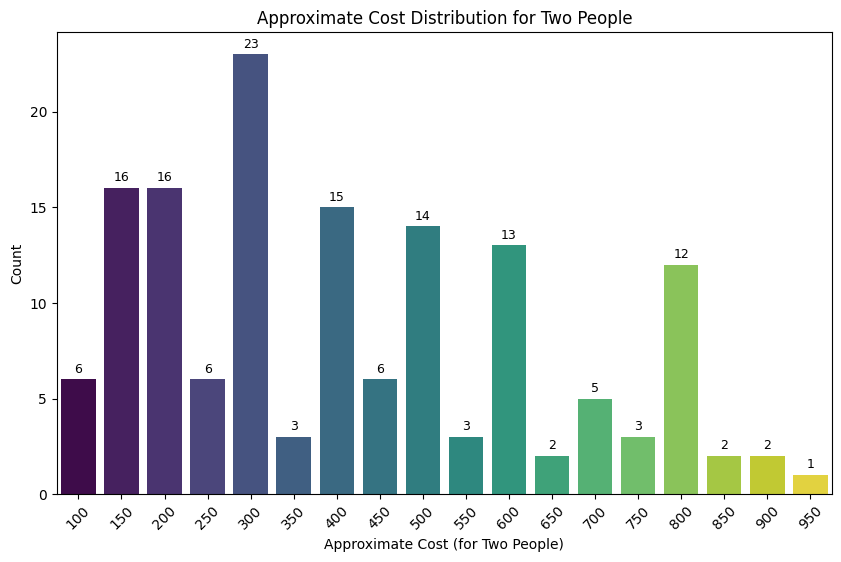

In [41]:
# Plot countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='approx_cost(for two people)', hue='approx_cost(for two people)', palette='viridis', legend=False)

# Add counts on top of each bar
ax = plt.gca()  # Get current Axes
for p in ax.patches:
    count = int(p.get_height())  # Get height of the bar
    x = p.get_x() + p.get_width() / 2  # X-coordinate for annotation
    y = p.get_height()  # Y-coordinate for annotation
    ax.text(x, y + 0.2, str(count), ha='center', va='bottom', fontsize=9, color='black')  # Add text

# Customize the plot
plt.title('Approximate Cost Distribution for Two People')
plt.xlabel('Approximate Cost (for Two People)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

## 6) Now we will examine whether online orders receive higher ratings than offline orders.

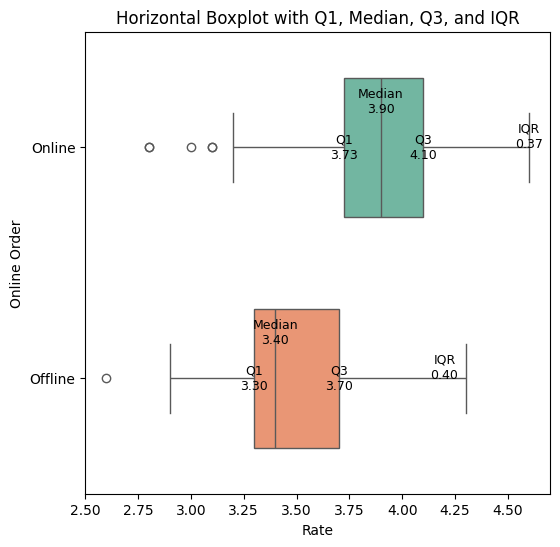

In [32]:
# Calculate Q1, median, Q3, and IQR for each category in 'online_order'
grouped = dataframe.groupby('online_order')['rate']
q1 = grouped.quantile(0.25)
median = grouped.median()
q3 = grouped.quantile(0.75)
iqr = q3 - q1

# Create a color palette for categories
palette = sns.color_palette('Set2', len(dataframe['online_order'].unique()))

# Plot the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(x='rate', y='online_order', data=dataframe, palette=palette, hue = 'online_order', width=0.6,legend=False)

# Annotate the plot with Q1, median, Q3, and IQR
for i, category in enumerate(dataframe['online_order'].unique()):
    # Get the corresponding values
    y_pos = i  # For horizontal boxplot, y-axis positions match the category indices
    x_q1 = q1[category]
    x_median = median[category]
    x_q3 = q3[category]
    x_iqr = iqr[category]
    
    # Annotate Q1
    plt.text(x_q1, y_pos, f"Q1\n{x_q1:.2f}", ha='center', va='center', fontsize=9)
    # Annotate Median
    plt.text(x_median, y_pos-0.2, f"Median\n{x_median:.2f}", ha='center', va='center', fontsize=9)
    # Annotate Q3
    plt.text(x_q3, y_pos, f"Q3\n{x_q3:.2f}", ha='center', va='center', fontsize=9)
    # Annotate IQR
    plt.text(x_q3 + 0.5, y_pos, f"IQR\n{x_iqr:.2f}", ha='center', fontsize=9)

# Add title and labels
plt.title('Horizontal Boxplot with Q1, Median, Q3, and IQR')
plt.xlabel('Rate')
plt.ylabel('Online Order')

plt.show()

### CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

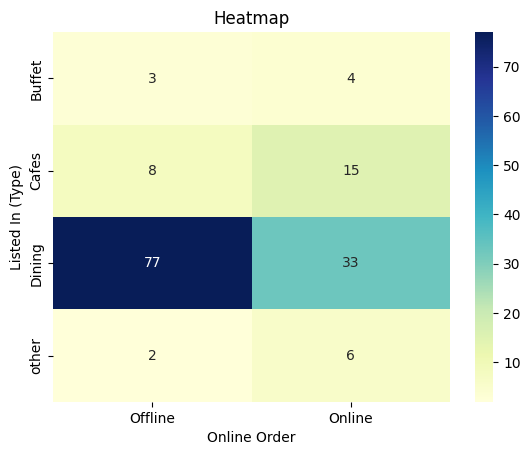

In [42]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

### CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.